In [2]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
import math


import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
#Reading the CSV/dropping null values and used values method 
df = pd.read_csv('winequality-combined.csv')
df1 = df.dropna()
df2 = df1.values


In [50]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Red(0)/White(1)
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1


In [4]:
# Separating Dataset into Features and Target Variables
# X: (First 12 Columns)
# y: (Column 13)
# a-g and j

X = df1[['fixed acidity','volatile acidity','citric acid',
'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']].values
y = df2[:, 12]




In [5]:
#Splitting the data into train/test (80%/20%)
x_scale = preprocessing.scale(X)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.20, train_size=0.80)


In [6]:

logreg = linear_model.LogisticRegression(C=10**8) #no regularization 
logreg.fit(x_train, y_train)
yhat_train = logreg.predict(x_train)

acc_train = accuracy_score(y_train, yhat_train)
print("Accuracy on training data = %f" % acc_train)

yhat_test = logreg.predict(x_test)
acc_test = accuracy_score(y_test, yhat_test)
print("Accuracy on test data = %f" % acc_test)


Accuracy on training data = 0.984607
Accuracy on test data = 0.980769


In [7]:
#Logistic Model without Regularization 
w = logreg.coef_
intercept = logreg.intercept_
prec, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average='binary')
print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)
print("Coefficients:",w)
print("Intercept:",intercept)


Precision: 0.9895541401273885 
Recall: 0.9900586286005608 
Fscore: 0.9898063200815495
Coefficients: [[-1.40386938 -1.84818203  0.47032318  1.09401363 -1.36495328 -0.93228198
   3.779585   -1.56926342]]
Intercept: [4.32012665]


In [45]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
acc_train_ridge = []
acc_test_ridge = []
fscore_test_ridge = []
for c in cVals:
    # Creating Logistic Regression model object with 'l2' regularization
    logreg_l2 = linear_model.LogisticRegression(C = c)

    # Fitting model on training set
    logreg_l2.fit(x_train,y_train)

    # Finding prediction on training set
    yhat_train_l2 = logreg_l2.predict(x_train)

    # Finding training accuracy
    acc_train_l2 = accuracy_score(y_train, yhat_train_l2)
    acc_train_ridge.append(acc_train_l2)
    print("Accuracy on train data with ridge = %f" % acc_train_l2)

print('')

for c in cVals:
    logreg_l2 = linear_model.LogisticRegression(C = c)
    logreg_l2.fit(x_train,y_train)
    # Finding prediction on testing set
    yhat_test_l2 = logreg_l2.predict(x_test)

    # Finding testing accuracy
    acc_test_l2 = accuracy_score(y_test, yhat_test_l2)
    acc_test_ridge.append(acc_test_l2)

    # Finding fscore on test data
    prec_l2, recall_l2 ,fscore_l2,_ = precision_recall_fscore_support(y_test,yhat_test_l2,average='binary')
    fscore_test_ridge.append(fscore_l2)
    print("Accuracy on test data with ridge(c={}): {}".format(c, fscore_l2))

Accuracy on train data with ridge = 0.761016
Accuracy on train data with ridge = 0.958245
Accuracy on train data with ridge = 0.979219
Accuracy on train data with ridge = 0.983837
Accuracy on train data with ridge = 0.984414
Accuracy on train data with ridge = 0.984607
Accuracy on train data with ridge = 0.984607

Accuracy on test data with ridge(c=0.0001): 0.8609271523178808
Accuracy on test data with ridge(c=0.001): 0.9715142428785607
Accuracy on test data with ridge(c=0.01): 0.9836734693877551
Accuracy on test data with ridge(c=0.1): 0.9866803278688524
Accuracy on test data with ridge(c=1): 0.9871860584315736
Accuracy on test data with ridge(c=10): 0.9871860584315736
Accuracy on test data with ridge(c=100): 0.9871860584315736


In [30]:
c = 1/(10**3)
logreg_l2 = linear_model.LogisticRegression(C = c)
logreg_l2.fit(x_train, y_train)

yhat_test_l2 = logreg_l2.predict(x_test)
accuracy_test_l2 = accuracy_score(y_test, yhat_test_l2)
prec_l2, recall_l2 ,fscore_l2,_ = precision_recall_fscore_support(y_test,yhat_test_l2,average='binary')
print("Accuracy:", accuracy_test_l2,"\nPrecision:",prec_l2,"\nRecall:",recall_l2,"\nFscore:",fscore_l2)


Accuracy: 0.9561538461538461 
Precision: 0.9473684210526315 
Recall: 0.9969230769230769 
Fscore: 0.9715142428785607


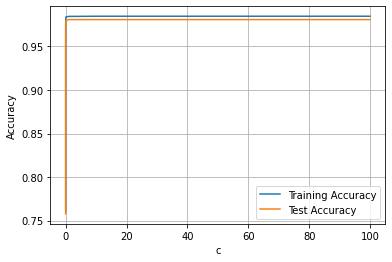

In [9]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_ridge, cVals, acc_test_ridge)
plt.grid()
plt.xlabel('c')
plt.ylabel('Accuracy')

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [39]:
#Implementing Lasso Regularization with our model. 
#Note that cVals is defined above 
acc_train_lasso = []
acc_test_lasso = []
fscore_test_lasso = []
for c in cVals: 
    logreg_l1 = linear_model.LogisticRegression(penalty = 'l1', C = c, solver = 'saga')
    logreg_l1.fit(x_train,y_train)
    yhat_train_l1 = logreg_l1.predict(x_train)
    acc_train_l1 = accuracy_score(y_train, yhat_train_l1)
    print("Accuracy with Ridge Regression (train):",acc_train_l1)
    acc_train_lasso.append(acc_train_l1)

print()

for c in cVals:
    logreg_l1 = linear_model.LogisticRegression(penalty = 'l1', C = c, solver = 'saga')
    logreg_l1.fit(x_train,y_train)
    yhat_test_l1 = logreg_l1.predict(x_test)
    acc_test_l1 = accuracy_score(y_test, yhat_test_l1)
    print("Accuracy with Ridge Regression (test):",acc_test_l1)
    prec_l1, recall_l1 ,fscore_l1,_ = precision_recall_fscore_support(y_test,yhat_test_l1,average='binary')
    fscore_test_lasso.append(fscore_l1)
    acc_test_lasso.append(acc_test_l1)

print(fscore_test_lasso)

Accuracy with Ridge Regression (train): 0.7548585722532231
Accuracy with Ridge Regression (train): 0.7948816624975947
Accuracy with Ridge Regression (train): 0.9780642678468348
Accuracy with Ridge Regression (train): 0.9832595728304792
Accuracy with Ridge Regression (train): 0.9846065037521647
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
Accuracy with Ridge Regression (train): 0.9846065037521647
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
Accuracy with Ridge Regression (train): 0.9846065037521647

Accuracy with Ridge Regression (test): 0.75
Accuracy with Ridge Regression (test): 0.7907692307692308
Accuracy with Ridge Regression (test): 0.9753846153846154
Accuracy w

In [28]:
#Comparing Accuracy, recall, fscore and precision for logreg with regularization
logreg_l1 = linear_model.LogisticRegression(penalty = 'l1', C = 1/10**2, solver = 'saga')
logreg_l1.fit(x_train,y_train)
yhat_test_l1 = logreg_l1.predict(x_test)
acc_test_l1 = accuracy_score(y_test, yhat_test_l1)
print("Accuracy with Lasso Regression (test):",acc_test_l1)
prec, recall ,fscore,_ = precision_recall_fscore_support(y_test,yhat_test_l1,average='binary')
print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)
#acc_test_lasso.append(acc_test_l1)


Accuracy with Lasso Regression (test): 0.9753846153846154
Precision: 0.977710233029382 
Recall: 0.9897435897435898 
Fscore: 0.9836901121304791


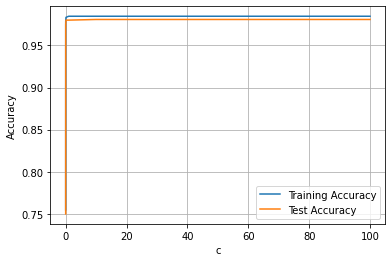

In [12]:
#Plotting the Test and Train accuracies for Lasso Regression
plt.plot(cVals, acc_train_lasso, cVals, acc_test_lasso)
plt.grid()
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

logreg_poly = linear_model.LogisticRegression(C = 10**8)
logreg_poly.fit(x_train_poly, y_train)
yhat_train_poly = logreg_poly.predict(x_train_poly)
yhat_test_poly = logreg_poly.predict(x_test_poly)


acc_train_poly = accuracy_score(y_train, yhat_train_poly)
acc_test_poly = accuracy_score(y_test, yhat_test_poly)
print("Accuracy with Polynomial Transform (train):",acc_train_poly)
print("Accuracy with Polynomial Transform (test):",acc_test_poly)

Accuracy with Polynomial Transform (train): 0.9940350202039638
Accuracy with Polynomial Transform (test): 0.9915384615384616
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
